<a href="https://colab.research.google.com/github/MuhammedMazinMH/Ai_Expense_tracker/blob/main/house_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


In [4]:
# Upload the file manually in Google Colab
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [5]:


# Load the CSV (use exact filename as uploaded)
df = pd.read_csv('train.csv')

# Preview the data
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


In [7]:
# Drop columns with too many missing values
df = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)

# Fill remaining missing numerical values with median
df = df.fillna(df.median(numeric_only=True))

# Fill categorical missing values with mode
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-7-54702d6c520f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [8]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [9]:
# Define target variable
y = df['SalePrice']

# Define feature set (drop 'Id' and 'SalePrice')
X = df.drop(['Id', 'SalePrice'], axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)


Root Mean Squared Error: 34423.876602233104
R² Score: 0.8455080985714246


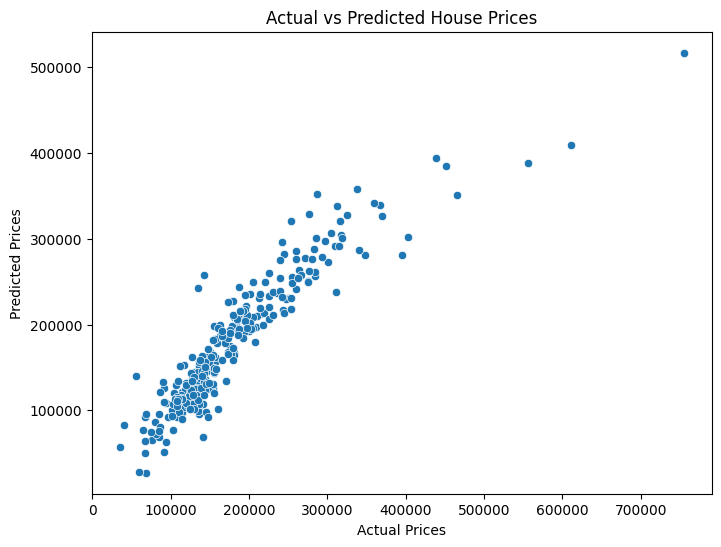

In [12]:
# Plot actual vs predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [13]:
# Install widgets in case it's not installed
!pip install ipywidgets --quiet

import ipywidgets as widgets
from IPython.display import display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.2 MB/s eta 0:00:00


In [21]:
# Select a few important features
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = df[features]
y = df['SalePrice']

# Split and train model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [25]:
def predict_price(b):

    input_data = pd.DataFrame([[
        overallqual_slider.value,
        grlivarea_text.value,
        garagecars_slider.value,
        totalbsmt_text.value,
        fullbath_slider.value,
        yearbuilt_text.value
    ]], columns=features)

    prediction = model.predict(input_data)[0]

    with output:
        output.clear_output()
        print(f" Predicted House Price: ${prediction:,.2f}")



In [29]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Create input widgets
qual = widgets.IntSlider(description='OverallQual', min=1, max=10, value=5, continuous_update=False)
area = widgets.IntText(description='GrLivArea', value=1500)
garage = widgets.IntSlider(description='GarageCars', min=0, max=4, value=2, continuous_update=False)
basement = widgets.IntText(description='TotalBsmtSF', value=1000)
bath = widgets.IntSlider(description='FullBath', min=0, max=4, value=2, continuous_update=False)
year = widgets.IntText(description='YearBuilt', value=2000)

# Group widgets nicely
row1 = widgets.HBox([qual, bath])
row2 = widgets.HBox([area, basement])
row3 = widgets.HBox([garage, year])

# Button
button = widgets.Button(description="💡 Predict Price", button_style='success', layout=widgets.Layout(width='200px'))

# Output area
output = widgets.Output()

# Display all
form = widgets.VBox([
    widgets.HTML(value="<h2 style='color:teal;'>🏡 House Price Predictor</h2>"),
    row1,
    row2,
    row3,
    widgets.HBox([button]),
    output
])
display(form)

# Define prediction logic
def predict_price(b):
    input_data = pd.DataFrame([[
        qual.value,
        area.value,
        garage.value,
        basement.value,
        bath.value,
        year.value
    ]], columns=features)

    prediction = model.predict(input_data)[0]

    with output:
        output.clear_output()
        print(f"💰 Predicted House Price: ${prediction:,.2f}")

# Link button to function
button.on_click(predict_price)
